In [16]:
import numpy as np #linear algebra
import pandas as pd

In [17]:
df= pd.read_csv('bread basket.csv')

In [18]:
df.head()


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [19]:
df.tail()

,Transaction,Item,date_time,period_day,weekday_weekend
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend
20506,9684,Smoothies,09-04-2017 15:04,afternoon,weekend


In [20]:
df.shape

(20507, 5)

In [21]:
df.isnull()

,Transaction,Item,date_time,period_day,weekday_weekend
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20502,False,False,False,False,False
20503,False,False,False,False,False
20504,False,False,False,False,False
20505,False,False,False,False,False


In [22]:
#splitsmthe Datafram into grups based on unique values
df_new = df.head(50)
transactions = df_new.groupby('Transaction')
for t, t_data in transactions:
    print(t)
    print(t_data)

1
   Transaction   Item         date_time period_day weekday_weekend
0            1  Bread  30-10-2016 09:58    morning         weekend
2
   Transaction          Item         date_time period_day weekday_weekend
1            2  Scandinavian  30-10-2016 10:05    morning         weekend
2            2  Scandinavian  30-10-2016 10:05    morning         weekend
3
   Transaction           Item         date_time period_day weekday_weekend
3            3  Hot chocolate  30-10-2016 10:07    morning         weekend
4            3            Jam  30-10-2016 10:07    morning         weekend
5            3        Cookies  30-10-2016 10:07    morning         weekend
4
   Transaction    Item         date_time period_day weekday_weekend
6            4  Muffin  30-10-2016 10:08    morning         weekend
5
   Transaction    Item         date_time period_day weekday_weekend
7            5  Coffee  30-10-2016 10:13    morning         weekend
8            5  Pastry  30-10-2016 10:13    morning         we

In [23]:
df_new = df.head(100)
transactions = df_new.groupby('Item')
for t, t_data in transactions:
    print(t)
    print(t_data)

Basket
    Transaction    Item         date_time period_day weekday_weekend
31           13  Basket  30-10-2016 10:31    morning         weekend
64           31  Basket  30-10-2016 11:12    morning         weekend
Bread
    Transaction   Item         date_time period_day weekday_weekend
0             1  Bread  30-10-2016 09:58    morning         weekend
9             5  Bread  30-10-2016 10:13    morning         weekend
18            8  Bread  30-10-2016 10:20    morning         weekend
19            9  Bread  30-10-2016 10:21    morning         weekend
23           11  Bread  30-10-2016 10:27    morning         weekend
25           11  Bread  30-10-2016 10:27    morning         weekend
32           13  Bread  30-10-2016 10:31    morning         weekend
34           14  Bread  30-10-2016 10:32    morning         weekend
39           16  Bread  30-10-2016 10:37    morning         weekend
45           19  Bread  30-10-2016 10:43    morning         weekend
46           20  Bread  30-10-20

In [24]:
df_new.groupby('Item').count()

,Transaction,date_time,period_day,weekday_weekend
Item,,,,
Basket,2,2,2,2
Bread,21,21,21,21
Coffee,16,16,16,16
Cookies,1,1,1,1
Ella's Kitchen Pouches,1,1,1,1
Farm House,2,2,2,2
Fudge,2,2,2,2
Hot chocolate,3,3,3,3
Jam,5,5,5,5


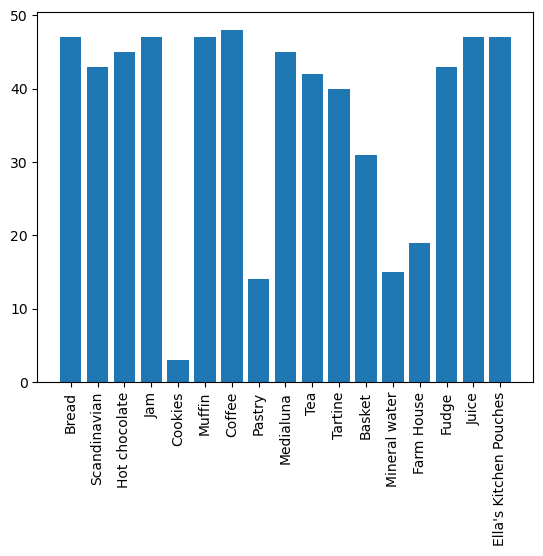

In [25]:
import matplotlib.pyplot as plt

plt.bar(df_new.Item,df_new.Transaction)
plt.xticks(rotation=90)
plt.show()

In [26]:
transactions.Transaction.count()

Item
Basket                     2
Bread                     21
Coffee                    16
Cookies                    1
Ella's Kitchen Pouches     1
Farm House                 2
Fudge                      2
Hot chocolate              3
Jam                        5
Juice                      2
Medialuna                 10
Mineral water              1
Muffin                     9
Pastry                     6
Scandinavian              12
Tartine                    2
Tea                        5
Name: Transaction, dtype: int64

In [27]:

from apyori import apriori

In [28]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [30]:
#extraxt transactions from grouped data
transaction_list = [t_data['Item'].tolist() for _,t_data in transactions]

In [32]:
# Apply Apriori algorithm with thresholds
results = list(apriori(transaction_list, min_support= 0.001, min_confidence=0.1, min_lift=3, max_length = 2))

In [33]:
print("Number of results:", len(results))

Number of results: 0


In [35]:
# Print the results
for result in results:
    print(result)